# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [53]:
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, confusion_matrix

In [4]:
plt.rc('font', size=15)
plt.style.use('dark_background')

# Importing the Input Datasets

In [5]:
Patient_history = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthCare Case Study - End to End Foundation/Patient_history_samp.csv')

In [6]:
Review_patient_history = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthCare Case Study - End to End Foundation/Review_patient_history_samp.csv')

In [7]:
Review_transaction = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthCare Case Study - End to End Foundation/Rreview_transaction_coo.csv')

In [8]:
Transaction = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthCare Case Study - End to End Foundation/Transaction_coo.csv')

# Data Inspection

In [ ]:
print(Patient_history.head())
print(Patient_history.shape)
print(Patient_history.info())

          id    age gender       income
0  306535165  65-74      F  24000-31999
1  742231134  65-74      F       48000+
2  928807201  75-84      M  24000-31999
3   83686538    <65      F  32000-47999
4  755607449  65-74      F       48000+
(500000, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      500000 non-null  int64 
 1   age     497470 non-null  object
 2   gender  500000 non-null  object
 3   income  497469 non-null  object
dtypes: int64(1), object(3)
memory usage: 15.3+ MB
None


In [ ]:
print(Review_patient_history.head())
print(Review_patient_history.shape)
print(Review_patient_history.info())

          id    age gender       income
0  381693273  65-74      F  24000-31999
1  444060924  65-74      M  24000-31999
2    3641691  65-74      F  24000-31999
3  672653795  65-74      M       48000+
4  144916176    <65      F       48000+
(5000, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5000 non-null   int64 
 1   age     4974 non-null   object
 2   gender  5000 non-null   object
 3   income  4974 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB
None


In [ ]:
print(Transaction.head())
print(Transaction.shape)
print(Transaction.info())

       id  global_proc_id  count
0  159125               1      1
1  191852               1      1
2  321083               1      1
3  383037               1      1
4  467729               1      1
(1514809, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514809 entries, 0 to 1514808
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   id              1514809 non-null  int64
 1   global_proc_id  1514809 non-null  int64
 2   count           1514809 non-null  int64
dtypes: int64(3)
memory usage: 34.7 MB
None


In [ ]:
print(Review_transaction.head())
print(Review_transaction.shape)
print(Review_transaction.info())

       id  global_proc_id  count
0   65822             109      1
1   65822             125      1
2  119695              70      1
3  119695             124      1
4  119695             125      1
(15041, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15041 entries, 0 to 15040
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              15041 non-null  int64
 1   global_proc_id  15041 non-null  int64
 2   count           15041 non-null  int64
dtypes: int64(3)
memory usage: 352.6 KB
None


In [11]:
print('Review_patient_history has',Review_patient_history.id.nunique(),'unique patient\'s ids.')
print('Review_transaction has',Review_transaction.id.nunique(),'unique patient\'s ids.')
print('Patient_history has',Patient_history.id.nunique(),'unique patient\'s ids.')
print('Transaction has',Transaction.id.nunique(),'unique patient\'s ids.')

Review_patient_history has 5000 unique patient's ids.
Review_transaction has 5000 unique patient's ids.
Patient_history has 500000 unique patient's ids.
Transaction has 505000 unique patient's ids.


Review_Patient_history has demographics of 5000 patients who have been marked for a Manual Review as they can be potentially involved in anomalous activites and Review_transaction data has transactions details of these mentioned patients.
Patient_history data has demographics of 500000 patients who are unmarked as of now and Transactions data have these patient's transaction's details along with details of previously mentioned 5000 marked patients.

# Exploratory Data Analysis

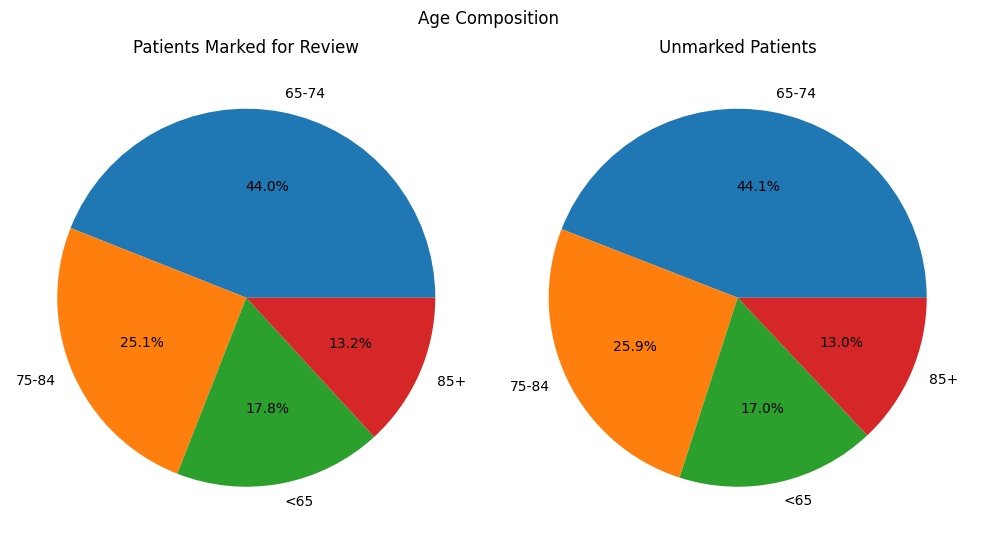

In [ ]:
with plt.style.context('default'):
  fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,6))
  ax = ax.flatten()
  ax[0].pie(Review_patient_history.age.value_counts(), autopct='%.1f%%', labels=Review_patient_history.age.value_counts().index)
  ax[1].pie(Patient_history.age.value_counts(), autopct='%.1f%%', labels=Patient_history.age.value_counts().index)
  ax[0].title.set_text('Patients Marked for Review')
  ax[1].title.set_text('Unmarked Patients')
  plt.suptitle('Age Composition')
  plt.tight_layout()
  plt.show()

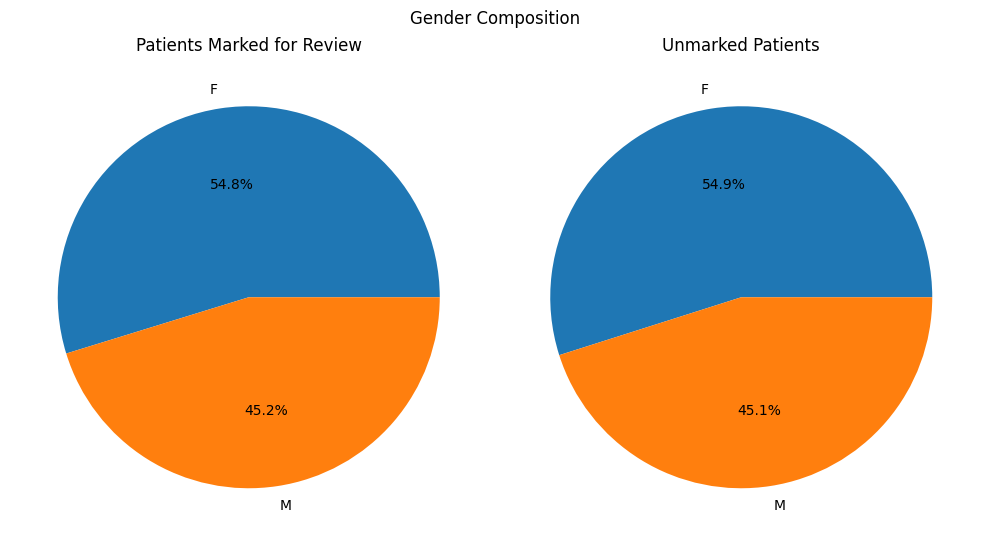

In [ ]:
with plt.style.context('default'):
  fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,6))
  ax = ax.flatten()
  ax[0].pie(Review_patient_history.gender.value_counts(), autopct='%.1f%%', labels=Review_patient_history.gender.value_counts().index)
  ax[1].pie(Patient_history.gender.value_counts(), autopct='%.1f%%', labels=Patient_history.gender.value_counts().index)
  ax[0].title.set_text('Patients Marked for Review')
  ax[1].title.set_text('Unmarked Patients')
  plt.suptitle('Gender Composition')
  plt.tight_layout()
  plt.show()

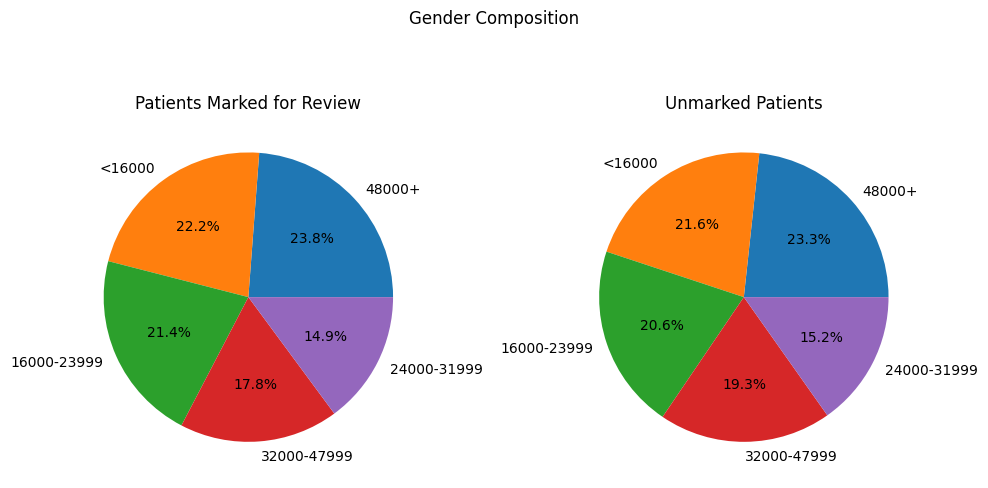

In [ ]:
with plt.style.context('default'):
  fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,6))
  ax = ax.flatten()
  ax[0].pie(Review_patient_history.income.value_counts(), autopct='%.1f%%', labels=Review_patient_history.income.value_counts().index)
  ax[1].pie(Patient_history.income.value_counts(), autopct='%.1f%%', labels=Patient_history.income.value_counts().index)
  ax[0].title.set_text('Patients Marked for Review')
  ax[1].title.set_text('Unmarked Patients')
  plt.suptitle('Gender Composition')
  plt.tight_layout()
  plt.show()

# Data Preparation

## Derive Variable Creation

### Age Group for Age

In [9]:
list(Review_patient_history.age.unique())

['65-74', '<65', '75-84', '85+', nan]

#### For Review Data

In [10]:
Review_patient_history['age_group'] = np.where(Review_patient_history.age=='<65',1,np.where(Review_patient_history.age=='65-74',2,np.where(Review_patient_history.age=='75-84',3,np.where(Review_patient_history.age=='85+',4,np.NaN))))

#### For Unmarked Data

In [12]:
Patient_history['age_group'] = np.where(Patient_history.age=='<65',1,np.where(Patient_history.age=='65-74',2,np.where(Patient_history.age=='75-84',3,np.where(Patient_history.age=='85+',4,np.NaN))))

### Income Group

In [13]:
list(Review_patient_history.income.unique())

['24000-31999', '48000+', '32000-47999', '<16000', '16000-23999', nan]

#### For Review Data

In [14]:
Review_patient_history['income_group'] = np.where(Review_patient_history.income=='<16000',1,np.where(Review_patient_history.income=='16000-23999',2,np.where(Review_patient_history.income=='24000-31999',3,np.where(Review_patient_history.income=='32000-47999',4,np.where(Review_patient_history.income=='48000+',5,np.NaN)))))

#### For Unmarked Data

In [15]:
Patient_history['income_group'] = np.where(Patient_history.income=='<16000',1,np.where(Patient_history.income=='16000-23999',2,np.where(Patient_history.income=='24000-31999',3,np.where(Patient_history.income=='32000-47999',4,np.where(Patient_history.income=='48000+',5,np.NaN)))))

### Dropping the redundant variables

In [16]:
Review_patient_history.drop(columns=['age', 'income'], inplace=True)

In [17]:
Patient_history.drop(columns=['age', 'income'], inplace=True)

## Datasets Merging

### Merging Review Datasets

In [18]:
Review_Data = Review_transaction.merge(Review_patient_history, how='left', on='id')
Review_Data.head()

,id,global_proc_id,count,gender,age_group,income_group
0,65822,109,1,F,4.0,4.0
1,65822,125,1,F,4.0,4.0
2,119695,70,1,F,1.0,4.0
3,119695,124,1,F,1.0,4.0
4,119695,125,1,F,1.0,4.0


In [19]:
Review_Data.isna().sum()

id                 0
global_proc_id     0
count              0
gender             0
age_group         74
income_group      71
dtype: int64

### Merging Unmarked Patients Datasets



In [20]:
Unmarked_Data = Transaction.merge(Patient_history, how='left', on='id')
Unmarked_Data.head()

,id,global_proc_id,count,gender,age_group,income_group
0,159125,1,1,F,3.0,2.0
1,191852,1,1,M,2.0,1.0
2,321083,1,1,M,1.0,1.0
3,383037,1,1,F,3.0,5.0
4,467729,1,1,M,3.0,2.0


In [21]:
Unmarked_Data.isna().sum()

id                    0
global_proc_id        0
count                 0
gender            15041
age_group         22709
income_group      22520
dtype: int64

In [22]:
Unmarked_Data.shape

(1514809, 6)

#### Notice, how 'gender' has 15041 missing values in the 'Unmarked_Data'. This is because of 'Transaction' having transaction details for 5000 Review Patients. So these 15041 observations are redundant and we have to drop them.

In [23]:
Unmarked_Data = Unmarked_Data.drop(index=Unmarked_Data[Unmarked_Data.gender.isna()].index).reset_index(drop=True)

In [24]:
Unmarked_Data.shape

(1499768, 6)

### Adding a Flag Variable for Review

#### before Merging both Datasets Together

In [25]:
Review_Data['Review'] = 1

In [26]:
Unmarked_Data['Review'] = 0

### Dropping 'count' Variable from both Datasets

As It only has 1 unique value which makes it insignificant.

In [27]:
print('Number of Unique Values in Review Data : {} | Number of Unmarked Data : {}'.format(Review_Data['count'].nunique(), Unmarked_Data['count'].nunique()))

Number of Unique Values in Review Data : 1 | Number of Unmarked Data : 1


In [28]:
Review_Data.drop(columns=['count'], inplace=True)
Unmarked_Data.drop(columns=['count'], inplace=True)

### Merging Review and Sample of Unmarked Data Together to make a Balance Data for Modelling

In [29]:
print('Review Data has {} observations, so we have to get same amount of observations from Unmarked Data and combine them to make a Data for Modelling with balance classes in the Dependent Variable i.e. \'Review.'.format(Review_Data.shape[0]))
print('So we need {:.2f} fraction of whole Unmarked Data to match it up with number of observations of Review Data'.format(Review_Data.shape[0]/Unmarked_Data.shape[0]))

Review Data has 15041 observations, so we have to get same amount of observations from Unmarked Data and combine them to make a Data for Modelling with balance classes in the Dependent Variable i.e. 'Review.
So we need 0.01 fraction of whole Unmarked Data to match it up with number of observations of Review Data


#### Shuffling and then getting a 0.01 fraction of Unmarked Data

In [30]:
Sample_Unmarked_data = Unmarked_Data.sample(frac=0.01, random_state=12345).reset_index(drop=True)
Sample_Unmarked_data.head()

,id,global_proc_id,gender,age_group,income_group,Review
0,505434105,25,F,2.0,1.0,0
1,996601452,4,F,2.0,1.0,0
2,580366274,27,F,2.0,2.0,0
3,593244527,27,M,2.0,1.0,0
4,204551826,17,F,2.0,2.0,0


In [31]:
Sample_Unmarked_data.shape

(14998, 6)

In [32]:
Merged_Data = pd.concat([Review_Data, Sample_Unmarked_data], axis=0)
Merged_Data = Merged_Data.sample(frac=1).reset_index(drop=True)
Merged_Data.head()

,id,global_proc_id,gender,age_group,income_group,Review
0,500105774,13,M,2.0,5.0,0
1,219273017,91,M,2.0,2.0,1
2,295983401,22,F,2.0,4.0,0
3,725097312,53,M,2.0,NaN,1
4,8020965,99,F,4.0,4.0,1


In [33]:
Merged_Data.shape

(30039, 6)

In [34]:
Merged_Data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
id,30039.0,501283296.0,286585995.0,65822.0,252912258.0,501830713.0,748129364.0,999936222.0
global_proc_id,30039.0,58.0,37.0,1.0,26.0,48.0,92.0,130.0
age_group,29883.0,2.0,1.0,1.0,2.0,2.0,3.0,4.0
income_group,29901.0,3.0,1.0,1.0,2.0,3.0,4.0,5.0
Review,30039.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


# Data Pre-Processing

## Separating the Data into Features and Target

In [35]:
Features = Merged_Data[Merged_Data.columns.difference(['Review'])]
Target = Merged_Data['Review']
Features.head()

,age_group,gender,global_proc_id,id,income_group
0,2.0,M,13,500105774,5.0
1,2.0,M,91,219273017,2.0
2,2.0,F,22,295983401,4.0
3,2.0,M,53,725097312,NaN
4,4.0,F,99,8020965,4.0


## Splitting the Data into Train and Test Datasets

We will use stratified sampling to keep the classes balanced in the splitted Datasets

In [36]:
train_x, test_x, train_y, test_y = train_test_split(Features, Target, test_size=0.3, random_state=12345)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(21027, 5)
(9012, 5)
(21027,)
(9012,)


In [37]:
train_x = train_x.reset_index(drop=True)
test_x = test_x.reset_index(drop=True)

## Missing Value Treatment

In [38]:
round(train_x.isna().sum()/train_x.shape[0]*100,2)

age_group         0.49
gender            0.00
global_proc_id    0.00
id                0.00
income_group      0.46
dtype: float64

In [39]:
round(test_x.isna().sum()/test_x.shape[0]*100,2)

age_group         0.58
gender            0.00
global_proc_id    0.00
id                0.00
income_group      0.47
dtype: float64

In [40]:
round(Unmarked_Data.isna().sum()/Unmarked_Data.shape[0]*100,2)

id                0.00
global_proc_id    0.00
gender            0.00
age_group         0.51
income_group      0.50
Review            0.00
dtype: float64

Only, income_group and age_group have missing values and that too, a very small proportion of the respective variable (~0.5%).
So, We can either drop those observations as it wouldn't make much of a difference or just impute them with median, since they both are ordinal variables.

### Imputing with Median using SimpleImputer

In [41]:
imputer = SimpleImputer(strategy='median')

In [42]:
imputed_data_train = pd.DataFrame(imputer.fit_transform(train_x[['age_group', 'income_group']]), columns=['age_group', 'income_group'])
imputed_data_test = pd.DataFrame(imputer.transform(test_x[['age_group', 'income_group']]), columns=['age_group', 'income_group'])
imputed_data_unmarked = pd.DataFrame(imputer.transform(Unmarked_Data[['age_group', 'income_group']]), columns=['age_group', 'income_group'])
imputed_data_train.head()

,age_group,income_group
0,2.0,3.0
1,4.0,2.0
2,3.0,2.0
3,4.0,3.0
4,1.0,5.0


In [43]:
train_x.drop(columns=['age_group', 'income_group'], inplace=True)
test_x.drop(columns=['age_group', 'income_group'], inplace=True)
Unmarked_Data.drop(columns=['age_group', 'income_group'], inplace=True)

In [44]:
train_x = pd.concat([train_x, imputed_data_train], axis=1)
test_x = pd.concat([test_x, imputed_data_test], axis=1)
Unmarked_Data = pd.concat([Unmarked_Data, imputed_data_unmarked], axis=1)

In [45]:
train_x.isna().sum()

gender            0
global_proc_id    0
id                0
age_group         0
income_group      0
dtype: int64

## Encoding Binary Vaiable

In [46]:
train_x.gender = train_x.gender.map({'F':0, 'M':1})
test_x.gender = test_x.gender.map({'F':0, 'M':1})
Unmarked_Data.gender = Unmarked_Data.gender.map({'F':0, 'M':1})

## Creating Dummy Variables

In [47]:
print('\'global_proc_id\' has %d categories.'%train_x.global_proc_id.nunique())

'global_proc_id' has 130 categories.


In [48]:
OHEnc = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

In [49]:
OH_cols_train = pd.DataFrame(OHEnc.fit_transform(train_x[['global_proc_id']]), columns=OHEnc.get_feature_names_out())
OH_cols_test = pd.DataFrame(OHEnc.transform(test_x[['global_proc_id']]), columns=OHEnc.get_feature_names_out())
OH_cols_unmarked = pd.DataFrame(OHEnc.transform(Unmarked_Data[['global_proc_id']]), columns=OHEnc.get_feature_names_out())
OH_cols_train.head()

,global_proc_id_2,global_proc_id_3,global_proc_id_4,global_proc_id_5,global_proc_id_6,global_proc_id_7,global_proc_id_8,global_proc_id_9,global_proc_id_10,global_proc_id_11,global_proc_id_12,global_proc_id_13,global_proc_id_14,global_proc_id_15,global_proc_id_16,global_proc_id_17,global_proc_id_18,global_proc_id_19,global_proc_id_20,global_proc_id_21,global_proc_id_22,global_proc_id_23,global_proc_id_24,global_proc_id_25,global_proc_id_26,global_proc_id_27,global_proc_id_28,global_proc_id_29,global_proc_id_30,global_proc_id_31,global_proc_id_32,global_proc_id_33,global_proc_id_34,global_proc_id_35,global_proc_id_36,global_proc_id_37,global_proc_id_38,global_proc_id_39,global_proc_id_40,global_proc_id_41,...,global_proc_id_91,global_proc_id_92,global_proc_id_93,global_proc_id_94,global_proc_id_95,global_proc_id_96,global_proc_id_97,global_proc_id_98,global_proc_id_99,global_proc_id_100,global_proc_id_101,global_proc_id_102,global_proc_id_103,global_proc_id_104,global_proc_id_105,global_proc_id_106,global_proc_id_107,global_proc_id_108,global_proc_id_109,global_proc_id_110,global_proc_id_111,global_proc_id_112,global_proc_id_113,global_proc_id_114,global_proc_id_115,global_proc_id_116,global_proc_id_117,global_proc_id_118,global_proc_id_119,global_proc_id_120,global_proc_id_121,global_proc_id_122,global_proc_id_123,global_proc_id_124,global_proc_id_125,global_proc_id_126,global_proc_id_127,global_proc_id_128,global_proc_id_129,global_proc_id_130
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Dropping 'global_proc_id'.

In [50]:
train_x.drop(columns=['global_proc_id'], inplace=True)
test_x.drop(columns=['global_proc_id'], inplace=True)

## Merging the Dummy Variables with the Original Data

In [51]:
train_x_final = pd.concat([train_x, OH_cols_train], axis=1)
test_x_final = pd.concat([test_x, OH_cols_test], axis=1)
Unmarked_Data_final = pd.concat([Unmarked_Data[Unmarked_Data.columns.difference(['global_proc_id'])], OH_cols_unmarked], axis=1)
train_x_final.head()

,gender,id,age_group,income_group,global_proc_id_2,global_proc_id_3,global_proc_id_4,global_proc_id_5,global_proc_id_6,global_proc_id_7,global_proc_id_8,global_proc_id_9,global_proc_id_10,global_proc_id_11,global_proc_id_12,global_proc_id_13,global_proc_id_14,global_proc_id_15,global_proc_id_16,global_proc_id_17,global_proc_id_18,global_proc_id_19,global_proc_id_20,global_proc_id_21,global_proc_id_22,global_proc_id_23,global_proc_id_24,global_proc_id_25,global_proc_id_26,global_proc_id_27,global_proc_id_28,global_proc_id_29,global_proc_id_30,global_proc_id_31,global_proc_id_32,global_proc_id_33,global_proc_id_34,global_proc_id_35,global_proc_id_36,global_proc_id_37,...,global_proc_id_91,global_proc_id_92,global_proc_id_93,global_proc_id_94,global_proc_id_95,global_proc_id_96,global_proc_id_97,global_proc_id_98,global_proc_id_99,global_proc_id_100,global_proc_id_101,global_proc_id_102,global_proc_id_103,global_proc_id_104,global_proc_id_105,global_proc_id_106,global_proc_id_107,global_proc_id_108,global_proc_id_109,global_proc_id_110,global_proc_id_111,global_proc_id_112,global_proc_id_113,global_proc_id_114,global_proc_id_115,global_proc_id_116,global_proc_id_117,global_proc_id_118,global_proc_id_119,global_proc_id_120,global_proc_id_121,global_proc_id_122,global_proc_id_123,global_proc_id_124,global_proc_id_125,global_proc_id_126,global_proc_id_127,global_proc_id_128,global_proc_id_129,global_proc_id_130
0,0,30257935,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,972260878,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,508973273,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,572718645,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,152743471,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
final_cols = train_x_final.columns.difference(['id', 'Review'])
print(final_cols)

Index(['age_group', 'gender', 'global_proc_id_10', 'global_proc_id_100',
       'global_proc_id_101', 'global_proc_id_102', 'global_proc_id_103',
       'global_proc_id_104', 'global_proc_id_105', 'global_proc_id_106',
       ...
       'global_proc_id_91', 'global_proc_id_92', 'global_proc_id_93',
       'global_proc_id_94', 'global_proc_id_95', 'global_proc_id_96',
       'global_proc_id_97', 'global_proc_id_98', 'global_proc_id_99',
       'income_group'],
      dtype='object', length=132)


## Scaling the Data

#### using MaxAbsScaler as the Data is very sparse (containing more zero values than non-zeroes values) and MaxAbsScaler scales the data while keeping its sparsity.

In [54]:
sc1 = MaxAbsScaler()

In [55]:
train_x_scaled = pd.DataFrame(sc1.fit_transform(train_x_final[final_cols]), columns=final_cols)
test_x_scaled = pd.DataFrame(sc1.transform(test_x_final[final_cols]), columns=final_cols)
train_x_scaled.head()

,age_group,gender,global_proc_id_10,global_proc_id_100,global_proc_id_101,global_proc_id_102,global_proc_id_103,global_proc_id_104,global_proc_id_105,global_proc_id_106,global_proc_id_107,global_proc_id_108,global_proc_id_109,global_proc_id_11,global_proc_id_110,global_proc_id_111,global_proc_id_112,global_proc_id_113,global_proc_id_114,global_proc_id_115,global_proc_id_116,global_proc_id_117,global_proc_id_118,global_proc_id_119,global_proc_id_12,global_proc_id_120,global_proc_id_121,global_proc_id_122,global_proc_id_123,global_proc_id_124,global_proc_id_125,global_proc_id_126,global_proc_id_127,global_proc_id_128,global_proc_id_129,global_proc_id_13,global_proc_id_130,global_proc_id_14,global_proc_id_15,global_proc_id_16,...,global_proc_id_64,global_proc_id_65,global_proc_id_66,global_proc_id_67,global_proc_id_68,global_proc_id_69,global_proc_id_7,global_proc_id_70,global_proc_id_71,global_proc_id_72,global_proc_id_73,global_proc_id_74,global_proc_id_75,global_proc_id_76,global_proc_id_77,global_proc_id_78,global_proc_id_79,global_proc_id_8,global_proc_id_80,global_proc_id_81,global_proc_id_82,global_proc_id_83,global_proc_id_84,global_proc_id_85,global_proc_id_86,global_proc_id_87,global_proc_id_88,global_proc_id_89,global_proc_id_9,global_proc_id_90,global_proc_id_91,global_proc_id_92,global_proc_id_93,global_proc_id_94,global_proc_id_95,global_proc_id_96,global_proc_id_97,global_proc_id_98,global_proc_id_99,income_group
0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6
1,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4
2,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4
3,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6
4,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Data Modelling - Supervised Learning

In [56]:
train_y.value_counts()

1    10561
0    10466
Name: Review, dtype: int64

The Classes are balanced

## Logistic Regression

### Original

In [ ]:
logreg1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=12345)
logreg1.fit(train_x_final[final_cols], train_y)

LogisticRegression(penalty='l1', random_state=12345, solver='liblinear')

In [ ]:
print('Training Accuracy : {} | Testing Accuracy : {}'.format(accuracy_score(train_y, logreg1.predict(train_x_final[final_cols])), accuracy_score(test_y, logreg1.predict(test_x_final[final_cols]))))
print('Training ROCAUC : {} | Testing ROCAUC : {}'.format(roc_auc_score(train_y, logreg1.predict_proba(train_x_final[final_cols])[:,1]), roc_auc_score(test_y, logreg1.predict_proba(test_x_final[final_cols])[:,1])))

Training Accuracy : 0.835639891567984 | Testing Accuracy : 0.831225033288948
Training ROCAUC : 0.8913843508386351 | Testing ROCAUC : 0.880890498180287


### Scaled

In [57]:
logreg2 = LogisticRegression(random_state=12345)
logreg2.fit(train_x_scaled , train_y)

LogisticRegression(random_state=12345)

In [58]:
print('Training Accuracy : {} | Testing Accuracy : {}'.format(accuracy_score(train_y, logreg2.predict(train_x_scaled)), accuracy_score(test_y, logreg2.predict(test_x_scaled))))
print('Training ROCAUC : {} | Testing ROCAUC : {}'.format(roc_auc_score(train_y, logreg2.predict_proba(train_x_scaled)[:,1]), roc_auc_score(test_y, logreg2.predict_proba(test_x_scaled)[:,1])))

Training Accuracy : 0.835259428354021 | Testing Accuracy : 0.8389924545051043
Training ROCAUC : 0.8902457885597169 | Testing ROCAUC : 0.8822134612202119


## Random Forest Classifier

### Original

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=100, random_state=12345)
rf_clf1.fit(train_x_final[final_cols], train_y)

RandomForestClassifier(random_state=12345)

In [ ]:
print('Training Accuracy : {} | Testing Accuracy : {}'.format(accuracy_score(train_y, rf_clf1.predict(train_x_final[final_cols])), accuracy_score(test_y, rf_clf1.predict(test_x_final[final_cols]))))
print('Training ROCAUC : {} | Testing ROCAUC : {}'.format(roc_auc_score(train_y, rf_clf1.predict_proba(train_x_final[final_cols])[:,1]), roc_auc_score(test_y, rf_clf1.predict_proba(test_x_final[final_cols])[:,1])))

Training Accuracy : 0.8655062538640795 | Testing Accuracy : 0.8078118064802485
Training ROCAUC : 0.9419290857538823 | Testing ROCAUC : 0.8627395948157769


### Scaled

In [59]:
rf_clf2 = RandomForestClassifier(n_estimators=50, random_state=12345)
rf_clf2.fit(train_x_scaled, train_y)

RandomForestClassifier(n_estimators=50, random_state=12345)

In [60]:
print('Training Accuracy : {} | Testing Accuracy : {}'.format(accuracy_score(train_y, rf_clf2.predict(train_x_scaled)), accuracy_score(test_y, rf_clf2.predict(test_x_scaled))))
print('Training ROCAUC : {} | Testing ROCAUC : {}'.format(roc_auc_score(train_y, rf_clf2.predict_proba(train_x_scaled)[:,1]), roc_auc_score(test_y, rf_clf2.predict_proba(test_x_scaled)[:,1])))

Training Accuracy : 0.8631283587768108 | Testing Accuracy : 0.8108078118064802
Training ROCAUC : 0.9410765721958567 | Testing ROCAUC : 0.862738901344408


## XGBoost Classifier (Extrme Gradient Boosting Machine)

### Original

In [ ]:
xgbc1 = XGBClassifier(random_state=12345)
xgbc1.fit(train_x_final[final_cols], train_y)

XGBClassifier(random_state=12345)

In [ ]:
print('Training Accuracy : {} | Testing Accuracy : {}'.format(accuracy_score(train_y, xgbc1.predict(train_x_final[final_cols])), accuracy_score(test_y, xgbc1.predict(test_x_final[final_cols]))))
print('Training ROCAUC : {} | Testing ROCAUC : {}'.format(roc_auc_score(train_y, xgbc1.predict_proba(train_x_final[final_cols])[:,1]), roc_auc_score(test_y, xgbc1.predict_proba(test_x_final[final_cols])[:,1])))

Training Accuracy : 0.8291244590288677 | Testing Accuracy : 0.817132711939636
Training ROCAUC : 0.8589828348244593 | Testing ROCAUC : 0.8498156108193899


### Scaled

In [61]:
xgbc2 = XGBClassifier(random_state=12345)
xgbc2.fit(train_x_scaled, train_y)

XGBClassifier(random_state=12345)

In [62]:
print('Training Accuracy : {} | Testing Accuracy : {}'.format(accuracy_score(train_y, xgbc2.predict(train_x_scaled)), accuracy_score(test_y, xgbc2.predict(test_x_scaled))))
print('Training ROCAUC : {} | Testing ROCAUC : {}'.format(roc_auc_score(train_y, xgbc2.predict_proba(train_x_scaled)[:,1]), roc_auc_score(test_y, xgbc2.predict_proba(test_x_scaled)[:,1])))

Training Accuracy : 0.8262709849241452 | Testing Accuracy : 0.8276742121615623
Training ROCAUC : 0.8603345712738747 | Testing ROCAUC : 0.8583333004980457


## Choosing a Classifer

XGBoost Classifier seems to be working better than RandomForest Classifier and is also easily tunable, so We will go with XGBoost Classifer on the Original Data but first we have to tune it by trying different Hyper Parameters values.

## Tuning the XGBoost Classifier - Original Data

#### UDFs to Tune XGBoost Classifer by Validating on the Test Datasets using Accuracy as Scoring

In [ ]:
def fit_model(**params):  
    model = XGBClassifier(random_state=12345, n_jobs=-1, **params).fit(train_x_final[final_cols], train_y)
    train_acc = accuracy_score(train_y, model.predict(train_x_final[final_cols]))
    test_acc = accuracy_score(test_y, model.predict(test_x_final[final_cols]))
    return train_acc, test_acc

In [ ]:
def fit_model_and_plot(param_name, param_values):
    train_scores, test_scores = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_acc, test_acc = fit_model(**params)
        train_scores.append(train_acc)
        test_scores.append(test_acc)
    with plt.style.context('dark_background'):  
      plt.figure(figsize=(16,8))
      plt.title('Overfitting Curve: ' + param_name)
      plt.plot(param_values, train_scores, 'y-o')
      plt.plot(param_values, test_scores, 'r-o')
      plt.xlabel(param_name)
      plt.ylabel('Accuracy')
      plt.grid(False)
      plt.legend(['Training', 'Testing'])

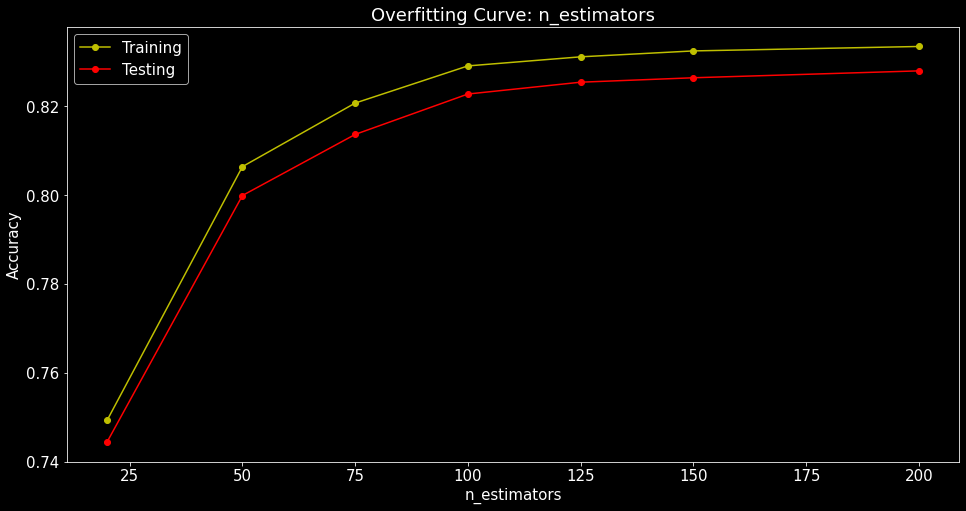

In [ ]:
fit_model_and_plot('n_estimators',[20,50,75,100,125,150,200])

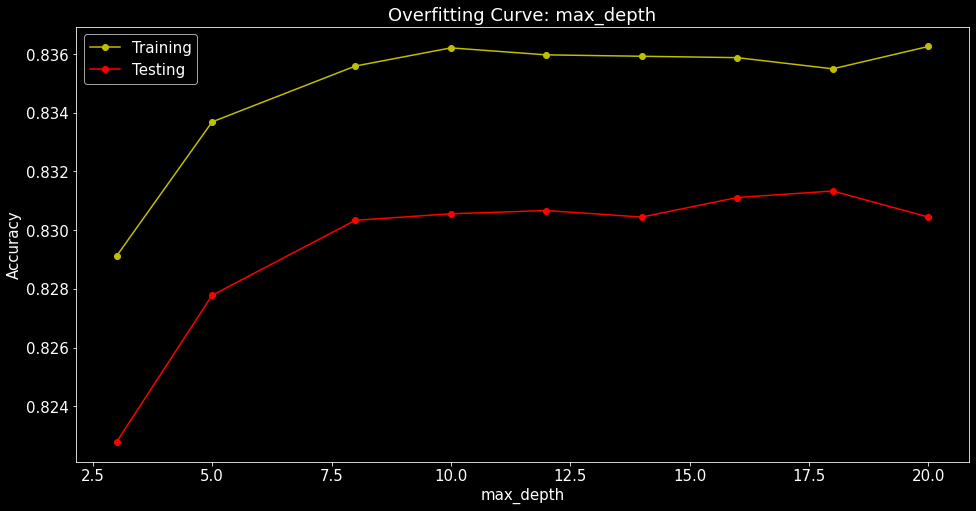

In [ ]:
fit_model_and_plot('max_depth',[3,5,8,10,12,14,16,18,20])

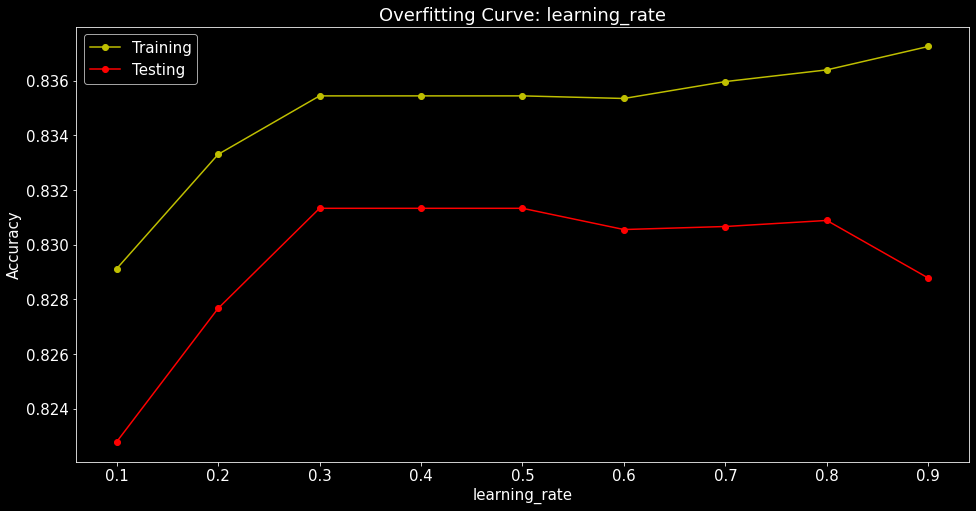

In [ ]:
fit_model_and_plot('learning_rate',[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

### Tuning Results :
*  n_estimators : 100
*  max_depth : 8
*  learning_rate : 0.3

#### Bulding the Final Model using the Tuned Parameter values

In [ ]:
xgbc = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.3, random_state=12345)
xgbc.fit(train_x_final[final_cols], train_y)

XGBClassifier(learning_rate=0.3, max_depth=8, random_state=12345)

In [ ]:
print('Training Accuracy : {} | Testing Accuracy : {}'.format(accuracy_score(train_y, xgbc.predict(train_x_final[final_cols])), accuracy_score(test_y, xgbc.predict(test_x_final[final_cols]))))
print('Training ROCAUC : {} | Testing ROCAUC : {}'.format(roc_auc_score(train_y, xgbc.predict_proba(train_x_final[final_cols])[:,1]), roc_auc_score(test_y, xgbc.predict_proba(test_x_final[final_cols])[:,1])))

Training Accuracy : 0.8370666286203453 | Testing Accuracy : 0.8327785175321794
Training ROCAUC : 0.9077332216831955 | Testing ROCAUC : 0.8771598986628012


In [ ]:
print(classification_report(test_y, xgbc.predict(test_x_final[final_cols])))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      4467
           1       0.78      0.94      0.85      4545

    accuracy                           0.83      9012
   macro avg       0.85      0.83      0.83      9012
weighted avg       0.85      0.83      0.83      9012



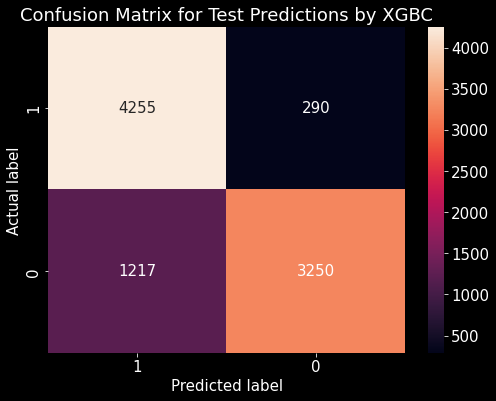

In [ ]:
cm_xgbc = confusion_matrix(test_y, xgbc.predict(test_x_final[final_cols]), labels=[1,0])
plt.figure(figsize=(8,6))
sns.heatmap(cm_xgbc, annot=True,  fmt='d', xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Test Predictions by XGBC')
plt.show()

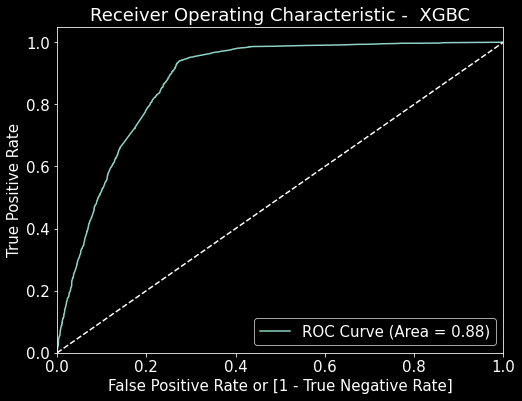

In [ ]:
fpr, tpr, thresholds = roc_curve(test_y, xgbc.predict_proba(test_x_final[final_cols])[:,1], drop_intermediate = False )
plt.figure(figsize=(8, 6))
plt.plot( fpr, tpr, label='ROC Curve (Area = %0.2f)' % roc_auc_score(test_y, xgbc.predict_proba(test_x_final[final_cols])[:,1]))
plt.plot([0, 1], [0, 1], 'w--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic -  XGBC')
plt.legend(loc="lower right")
plt.show()

### Predicting for the Anomalous Patients in Unmarked Data
#### using High Probability Value as cut off to ensure that we get the patients with high anomality potentials to mark them for manual review.

In [ ]:
Unmarked_Data['Predicted'] = xgbc.predict_proba(Unmarked_Data_final[final_cols])[:,1]>0.935

In [ ]:
Unmarked_Data[['id', 'Predicted']].groupby('Predicted').nunique()

,id
Predicted,
False,499570
True,11305


11305 unique patients are predicted as Anomalous Patients by the Model which needs to be Manually Reviewed

### using Feature Importance to get the Highly Significant Features

Text(0.5, 1.0, 'Feature Importance for Classification using XGBC')

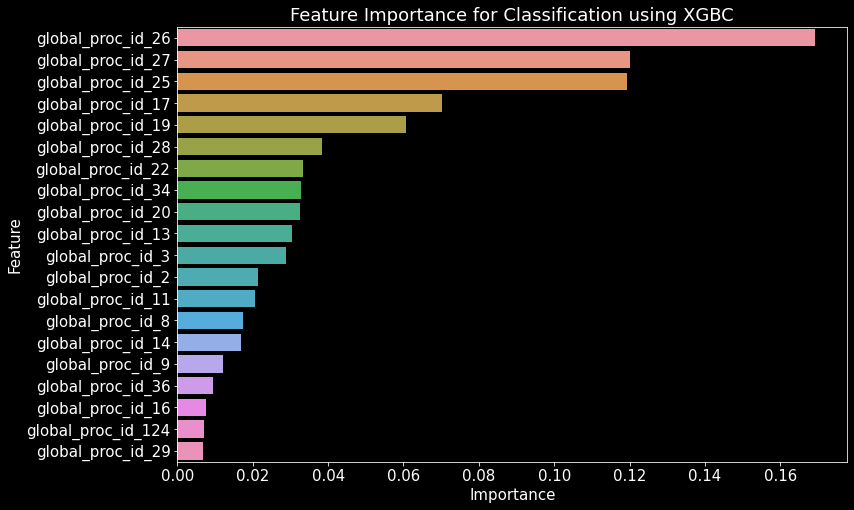

In [ ]:
f_importance_df = pd.DataFrame({
    'Feature':final_cols,
    'Importance':xgbc.feature_importances_.ravel()
}).sort_values('Importance', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(data=f_importance_df.head(20), x='Importance', y='Feature')
plt.title('Feature Importance for Classification using XGBC')

#### Selecting the Top 17 Features on the basis of their Significancy along with the three non-dummy variables for further Patients Clustering to evaluate our Predictions

In [ ]:
print(f_importance_df.head(17).Feature.to_list())

['global_proc_id_26', 'global_proc_id_27', 'global_proc_id_25', 'global_proc_id_17', 'global_proc_id_19', 'global_proc_id_28', 'global_proc_id_20', 'global_proc_id_13', 'global_proc_id_34', 'global_proc_id_22', 'global_proc_id_3', 'global_proc_id_2', 'global_proc_id_14', 'global_proc_id_11', 'global_proc_id_8', 'global_proc_id_9', 'global_proc_id_36']


In [63]:
selected_features = ['gender', 'age_group', 'income_group', 'global_proc_id_26', 'global_proc_id_27', 'global_proc_id_25', 'global_proc_id_17', 'global_proc_id_19',
                     'global_proc_id_28', 'global_proc_id_20', 'global_proc_id_13', 'global_proc_id_34', 'global_proc_id_22', 'global_proc_id_3', 'global_proc_id_2',
                     'global_proc_id_14', 'global_proc_id_11', 'global_proc_id_8', 'global_proc_id_9', 'global_proc_id_36']
len(selected_features)

20

# Segmentation - Ubsupervised Learning

## Pre-Processing before Clustering

### Scaling the Variables using MaxAbsScaler

In [64]:
sc2 = MaxAbsScaler()

In [65]:
data_scaled = pd.DataFrame(sc2.fit_transform(Unmarked_Data_final[selected_features]), columns=selected_features)
data_scaled.head()

,gender,age_group,income_group,global_proc_id_26,global_proc_id_27,global_proc_id_25,global_proc_id_17,global_proc_id_19,global_proc_id_28,global_proc_id_20,global_proc_id_13,global_proc_id_34,global_proc_id_22,global_proc_id_3,global_proc_id_2,global_proc_id_14,global_proc_id_11,global_proc_id_8,global_proc_id_9,global_proc_id_36
0,0.0,0.75,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.50,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.25,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.75,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dimension Redcution using TruncatedSVD

#### as TruncatedSVD works better than PCA on the Sparse Data

In [66]:
explained_var_dict = {}
for i in range(2,11):
  svd = TruncatedSVD(i, random_state=12345)
  svd.fit(data_scaled)
  explained_var_dict[i] = round(svd.explained_variance_ratio_.sum()*100,1)
explained_var_dict

{2: 30.9,
 3: 47.2,
 4: 58.3,
 5: 66.3,
 6: 73.4,
 7: 77.9,
 8: 81.6,
 9: 84.1,
 10: 86.4}

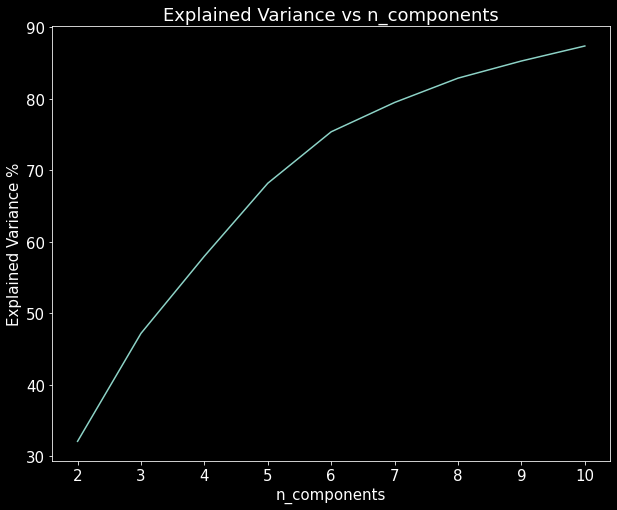

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(list(explained_var_dict.keys()), list(explained_var_dict.values()))
plt.xlabel('n_components')
plt.ylabel('Explained Variance %')
plt.title('Explained Variance vs n_components')
plt.show()

We will go for atleast 70% explained variance. So for n_components = 6 the variacne explained is 73% and as the increment in Variance Explained isn't much great after 6 components so to avoid higher dimensionalities, we will go for 6.

In [ ]:
svd = TruncatedSVD(6, random_state=12345)
reduced_data = pd.DataFrame(svd.fit_transform(data_scaled), columns=['C1','C2','C3','C4','C5','C6'])
reduced_data.shape

(1499768, 6)

## Clustering

### using KMeans Clustering

In [ ]:
km_3 = KMeans(n_clusters=3, init='k-means++', max_iter=100, random_state=12345).fit(reduced_data)
km_4 = KMeans(n_clusters=4, init='k-means++', max_iter=100, random_state=12345).fit(reduced_data)
km_5 = KMeans(n_clusters=5, init='k-means++', max_iter=100, random_state=12345).fit(reduced_data)
km_6 = KMeans(n_clusters=6, init='k-means++', max_iter=100, random_state=12345).fit(reduced_data)
km_7 = KMeans(n_clusters=7, init='k-means++', max_iter=100, random_state=12345).fit(reduced_data)
km_8 = KMeans(n_clusters=8, init='k-means++', max_iter=100, random_state=12345).fit(reduced_data)
km_9 = KMeans(n_clusters=9, init='k-means++', max_iter=100, random_state=12345).fit(reduced_data)
km_10 = KMeans(n_clusters=10, init='k-means++', max_iter=100, random_state=12345).fit(reduced_data)

## Quantitative Evaluation

### Segment Size Check

In [ ]:
SegmentDF = pd.DataFrame(index=range(0,10))
for km in [km_3, km_4, km_5, km_6, km_7, km_8, km_9, km_10]:
    SegmentDF = pd.concat((SegmentDF,((pd.Series(km.labels_).value_counts()/sum(pd.Series(km.labels_).value_counts()))).sort_index()), axis=1)

SegmentDF.columns = ['km_3', 'km_4', 'km_5', 'km_6', 'km_7', 'km_8', 'km_9', 'km_10']

SegmentDF

,km_3,km_4,km_5,km_6,km_7,km_8,km_9,km_10
0,0.363077,0.126302,0.373363,0.319281,0.146341,0.260872,0.154507,0.164774
1,0.194520,0.305815,0.087888,0.260872,0.260872,0.172941,0.087888,0.057262
2,0.442402,0.373363,0.305815,0.106632,0.106632,0.106632,0.119051,0.127082
3,NaN,0.194520,0.126302,0.099025,0.172941,0.146341,0.164774,0.106632
4,NaN,NaN,0.106632,0.087888,0.087888,0.099025,0.141821,0.087888
5,NaN,NaN,NaN,0.126302,0.099025,0.087888,0.106632,0.069039
6,NaN,NaN,NaN,NaN,0.126302,0.069039,0.057262,0.133789
7,NaN,NaN,NaN,NaN,NaN,0.057262,0.099025,0.044944
8,NaN,NaN,NaN,NaN,NaN,NaN,0.069039,0.154507
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054082


*  In 3 cluster solution, most of the Data is clustered in two clusters only out of the three. so any cluster solution above 3 up until 10 should work fine.

### Elbow Analysis 

In [ ]:
cluster_range = range(3,11)
cluster_errors = []
cluster_error = 0
error_diff = []

for km in [km_3, km_4, km_5, km_6, km_7, km_8, km_9, km_10]:
    cluster_errors.append(round(km.inertia_))
    if km == km_3:
      error_diff.append(0)
    else:
      error_diff.append(round(km.inertia_-cluster_error))
    cluster_error = round(km.inertia_)

clusters_df = pd.DataFrame({"Cluster Number":cluster_range, "Cluster Error":cluster_errors, "Error Difference":error_diff})

clusters_df

,Cluster Number,Cluster Error,Error Difference
0,3,709112,0
1,4,590431,-118681
2,5,518283,-72148
3,6,425843,-92440
4,7,374306,-51537
5,8,327431,-46875
6,9,284899,-42532
7,10,248043,-36856


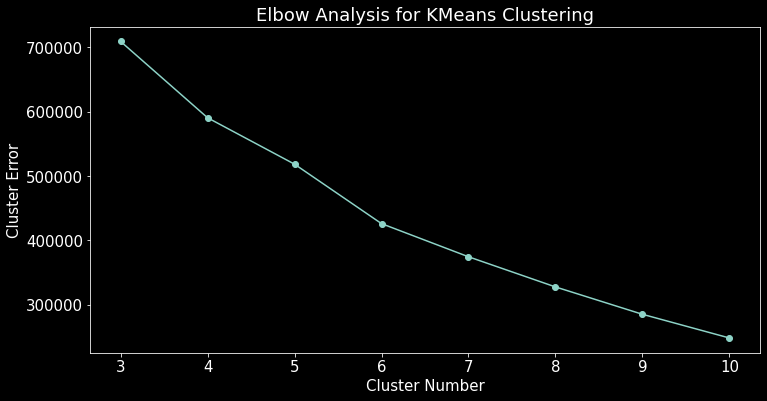

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df['Cluster Number'], clusters_df['Cluster Error'], marker = "o" )
plt.xlabel('Cluster Number')
plt.ylabel('Cluster Error')
plt.title('Elbow Analysis for KMeans Clustering')
plt.show()

The elbow diagram shows that the gain in explained variance reduces significantly after 6 clusters solution and Data is quite well distributed in 6 cluster solution as we have seen from segment size check. So, optimal number of clusters should be 6.

#### Building the Final KMeans Model with 6 Components

In [ ]:
km = KMeans(n_clusters=6, init='k-means++', max_iter=100, random_state=12345)
km.fit(reduced_data)

KMeans(max_iter=100, n_clusters=6, random_state=12345)

In [ ]:
Unmarked_Data['Cluster_Label'] = km.labels_

In [ ]:
Unmarked_Data[['Predicted', 'Cluster_Label']].groupby('Cluster_Label').sum()

,Predicted
Cluster_Label,
0,5843
1,5554
2,0
3,0
4,0
5,0


The Anomalous Patients are getting grouped at 1 st and 2 nd Cluster only

In [ ]:
Anamlous_Patients = Unmarked_Data[Unmarked_Data.Predicted==1][['id', 'gender', 'age_group', 'income_group','Cluster_Label']].reset_index(drop=True)
Anamlous_Patients.to_csv('Anamlous_Patients_df.csv')
Anamlous_Patients

,id,gender,age_group,income_group,Cluster_Label
0,1566375,0,2.0,3.0,0
1,2374219,0,2.0,3.0,0
2,2988750,0,2.0,5.0,0
3,3596932,0,2.0,5.0,0
4,3997763,0,3.0,1.0,0
...,...,...,...,...,...
11392,993531878,1,3.0,2.0,1
11393,994078684,1,2.0,5.0,1
11394,994642713,0,2.0,2.0,0
11395,996710340,0,4.0,4.0,0
